In [2]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import tifffile
import cellpose
from cellpose import models, io, plot, core
import time
from sklearn.model_selection import train_test_split
from statistics import mean

c:\Users\rz200\AppData\Local\anaconda3\envs\cellprob\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_data(path, num_imgs=4):

    images_path = path + '01/'
    onlyfiles = [f for f in listdir(images_path) if isfile(join(images_path, f))]
    onlyfiles.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    if num_imgs > len(onlyfiles): num_imgs = len(onlyfiles)
    images = [np.squeeze(tifffile.imread(images_path +  onlyfiles[i])) for i in range(num_imgs)]
    
    masks_path = path + '01_GT/TRA/'
    onlyfiles = [f for f in listdir(masks_path) if isfile(join(masks_path, f))][1:]
    onlyfiles.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    if num_imgs > len(onlyfiles): num_imgs = len(onlyfiles)
    masks = [np.squeeze(tifffile.imread(masks_path +  onlyfiles[i])) for i in range(num_imgs)]

    return images, masks

In [6]:
images, masks = get_data("c:\\Users\\rz200\\Documents\\development\\distillCellSegTrack\\" + 'datasets/Fluo-N2DL-HeLa/', num_imgs=92)
    #train_model(images,masks,150,'cellpose_trained_model')#
indices = [i for i in range(len(images))]
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(images, masks, indices, test_size=0.2, random_state=42)

#import our trained cellpose model
model = models.CellposeModel(gpu=core.use_gpu(), pretrained_model='segmentation/train_dir/models/cellpose_trained_model')
pred_masks = model.eval(X_test, batch_size=1, channels=[0,0], diameter=model.diam_labels)[0]

pretrained model has incorrect path


In [7]:
print(len(indices_train),len(indices_test))

73 19


In [12]:
print(indices_train)

[65, 15, 68, 78, 30, 33, 11, 66, 69, 31, 77, 9, 70, 5, 42, 47, 16, 45, 34, 7, 80, 27, 19, 76, 25, 53, 13, 24, 3, 17, 38, 8, 73, 6, 88, 36, 86, 56, 91, 54, 43, 50, 75, 46, 64, 61, 90, 84, 41, 58, 48, 81, 57, 32, 87, 59, 63, 79, 37, 29, 1, 52, 21, 2, 23, 85, 74, 82, 20, 60, 71, 14, 51]


In [19]:
print(indices_test)

[40, 22, 55, 72, 0, 26, 39, 67, 10, 44, 83, 35, 89, 62, 12, 4, 18, 28, 49]


In [20]:
#sort indices_test
indices_test.sort()
print(indices_test)

[0, 4, 10, 12, 18, 22, 26, 28, 35, 39, 40, 44, 49, 55, 62, 67, 72, 83, 89]


In [39]:
images, masks = get_data("c:\\Users\\rz200\\Documents\\development\\distillCellSegTrack\\" + 'datasets/Fluo-N2DL-HeLa/', num_imgs=92)


In [37]:
masks = [np.where(mask>0,1,0) for mask in masks]

In [40]:
print(np.unique(masks))

[  0   1   8   9  10  12  14  15  16  18  19  20  21  22  23  24  25  28
  29  30  32  33  35  36  37  39  40  41  43  44  45  46  48  49  50  51
  53  54  55  58  59  61  62  63  65  66  68  69  71  72  74  75  76  78
  79  80  82  84  85  86  88  89  91  92  93  94  96  97  98 100 101 102
 104 105 107 108 110 111 112 114 115 117 118 120 121 123 124 125 127 128
 130 131 132 133 135 136 137 139 140 141 143 144 146 147 149 150 151 153
 154 156 157 159 160 161 163 164 167 168 169 171 172 174 175 177 179 180
 182 183 185 186 188 189 190 192 193 195 196 197 199 200 202 203 204 207
 208 211 212 214 215 217 218 220 221 223 224 225 227 228 230 231 233 234
 238 239 241 242 244 245 247 248 257 259 260 262 263 265 266 268 269 270
 272 273 275 276 278 279 280 282 284 286 287 288 290 291 293 294 296 297
 299 300 302 303 304 305 307 308 310 311 313 314 315 317 318 321 322 324
 325 326 328 329 331 332 333 335 336 337 340 341 343 344 346 347 349 350
 351 352 353 355 356 358 359 361 362 363 364 365 36

In [35]:
images = [(image-np.min(image))/(np.max(image)-np.min(image)) for image in images]

In [36]:
print(images[0])

[[0.0169915  0.01049475 0.013993   ... 0.02898551 0.02648676 0.02298851]
 [0.01749125 0.02048976 0.02148926 ... 0.03148426 0.04097951 0.03248376]
 [0.01549225 0.02498751 0.02848576 ... 0.03448276 0.03698151 0.02548726]
 ...
 [0.01249375 0.013993   0.0169915  ... 0.0189905  0.01849075 0.01999   ]
 [0.011994   0.009995   0.00749625 ... 0.02398801 0.01999    0.0189905 ]
 [0.01449275 0.011994   0.01049475 ... 0.03648176 0.02798601 0.02248876]]


In [20]:
def get_IoU(predicted_masks,gt_masks):
    intersection_unions = []
    for i in range(len(predicted_masks)):
        intersection = np.logical_and(predicted_masks[i], gt_masks[i]).sum()
        union = np.logical_or(predicted_masks[i], gt_masks[i]).sum()
        intersection_unions.append(intersection/union)
    return mean(intersection_unions)

In [22]:
def get_dice(predicted_masks,gt_masks):
    dices = []
    for i in range(len(predicted_masks)):
        intersection = np.logical_and(predicted_masks[i], gt_masks[i]).sum()
        dice = (2*intersection)/(predicted_masks[i].sum() + gt_masks[i].sum())
        dices.append(dice)
    return mean(dices)

In [23]:
print(get_IoU(pred_masks,y_test))
print(get_dice(pred_masks,y_test))

0.33130866412330395
0.007461843468816593


In [34]:
print(X_train)

[array([[33060, 33059, 33056, ..., 33183, 33240, 33329],
       [33075, 33074, 33071, ..., 33229, 33312, 33469],
       [33076, 33071, 33064, ..., 33255, 33413, 33606],
       ...,
       [33023, 33009, 33020, ..., 33061, 33055, 33062],
       [33034, 33039, 33037, ..., 33056, 33061, 33061],
       [33029, 33027, 33024, ..., 33058, 33059, 33072]], dtype=uint16), array([[33057, 33064, 33063, ..., 33070, 33078, 33080],
       [33058, 33061, 33073, ..., 33064, 33069, 33083],
       [33043, 33063, 33061, ..., 33101, 33100, 33094],
       ...,
       [33040, 33039, 33035, ..., 33053, 33051, 33054],
       [33022, 33025, 33031, ..., 33060, 33068, 33063],
       [33024, 33018, 33020, ..., 33063, 33071, 33074]], dtype=uint16), array([[33046, 33065, 33064, ..., 33145, 33166, 33190],
       [33059, 33053, 33046, ..., 33140, 33181, 33244],
       [33064, 33069, 33075, ..., 33160, 33215, 33330],
       ...,
       [33031, 33047, 33041, ..., 33073, 33075, 33081],
       [33027, 33037, 33031, ..., 3

In [41]:
print(np.unique(y_test))

[  0   1   8   9  10  12  14  15  16  18  19  20  21  22  24  25  28  29
  30  32  33  36  37  39  40  41  43  44  45  46  48  49  50  51  53  54
  55  58  59  61  62  63  65  66  68  69  71  72  74  75  76  78  79  80
  82  84  85  86  88  89  91  93  94  96  97  98 100 101 102 104 105 107
 108 110 111 112 114 115 117 118 120 121 123 124 125 127 128 130 131 132
 133 135 136 137 139 140 141 143 144 146 147 149 150 151 153 154 156 157
 159 160 161 163 164 167 168 169 171 172 174 175 177 179 180 182 183 185
 186 188 189 190 192 193 195 196 197 199 200 202 203 204 207 208 211 212
 214 215 217 218 220 221 223 224 225 227 228 230 231 233 234 244 245 247
 248 257 259 260 262 263 265 266 270 272 273 275 276 278 279 280 282 284
 286 287 288 290 291 293 294 296 297 299 300 303 304 305 307 308 310 311
 313 314 315 317 318 321 322 324 325 326 328 329 331 332 333 335 336 337
 340 341 343 344 346 347 349 350 352 353 355 356 358 359 361 362 363 364
 365 366 368 369 371 372 374 375 376 377 380 383 38

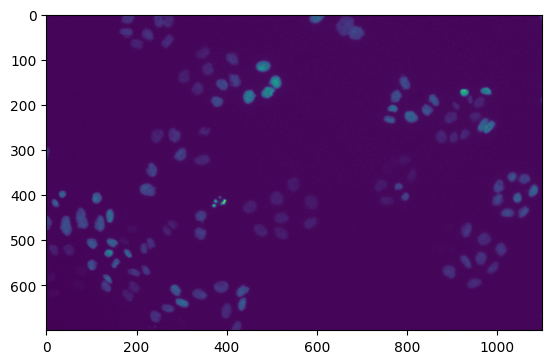

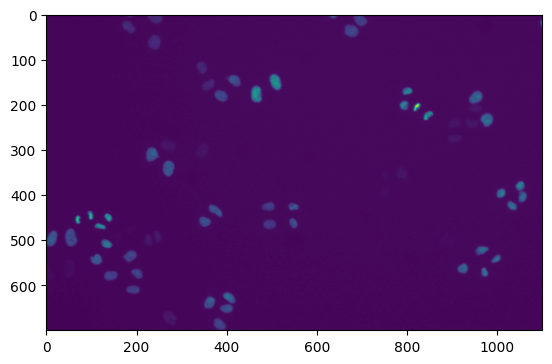

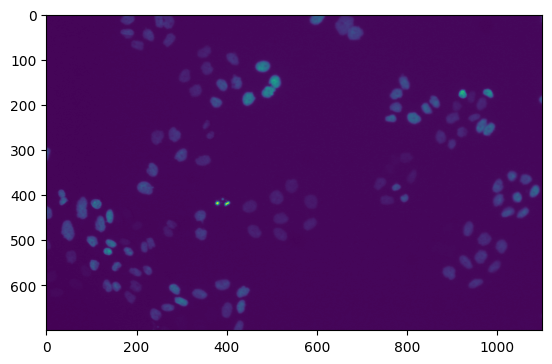

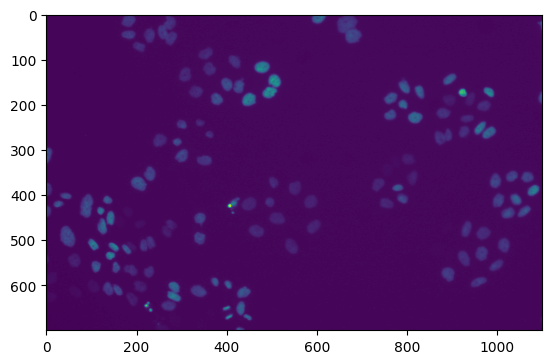

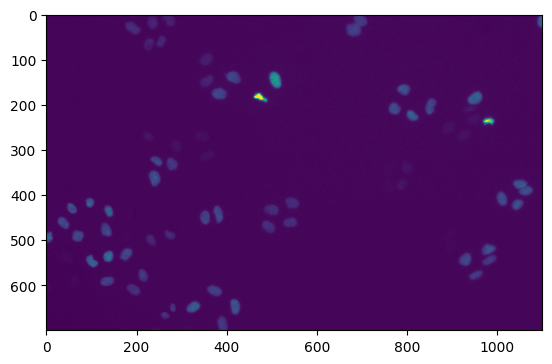

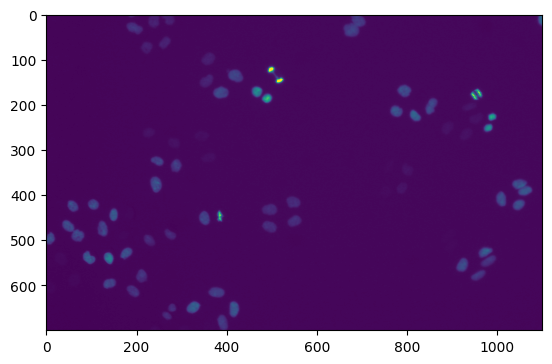

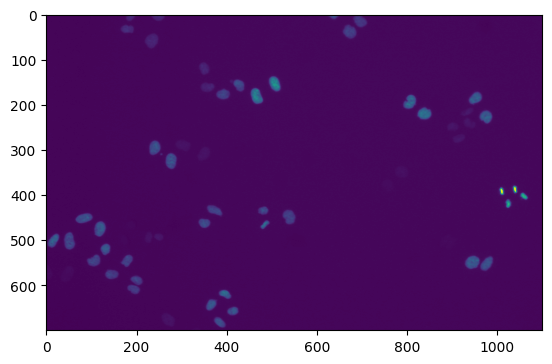

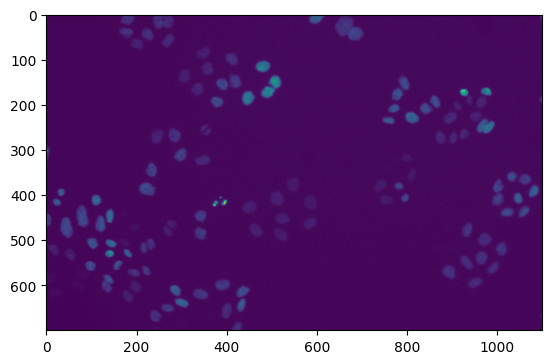

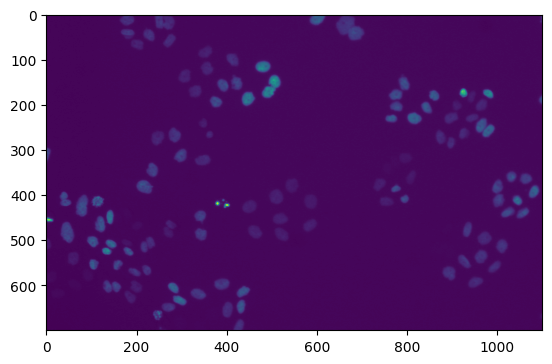

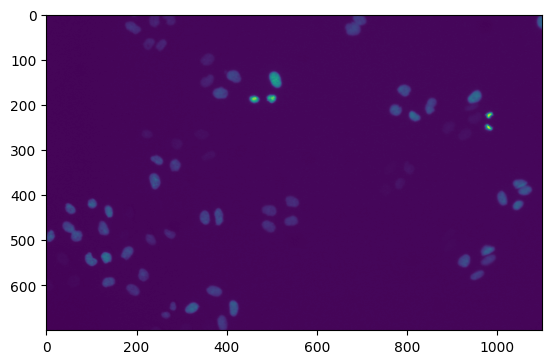

In [32]:
for i in range(10):
    plt.imshow(X_train[i])
    plt.show()

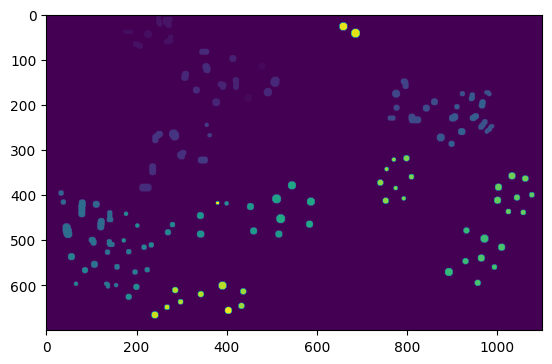

In [31]:
plt.imshow(y_train[2])
plt.show()

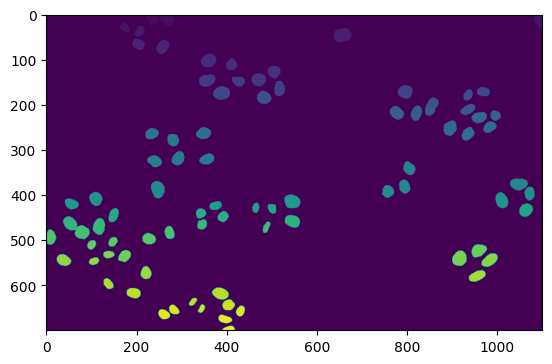

In [24]:
plt.imshow(pred_masks[0])
plt.show()

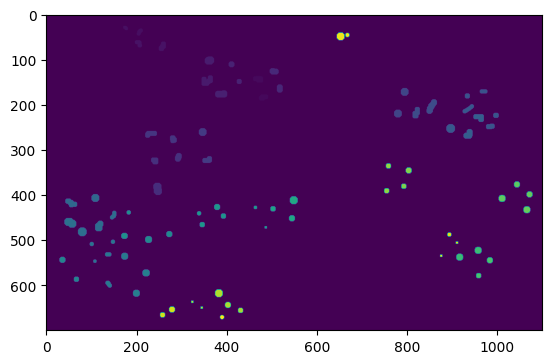

In [25]:
plt.imshow(y_test[0])
plt.show()